Part 1


In [69]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [70]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [71]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [72]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [73]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [74]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [75]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [76]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [77]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [78]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [79]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [80]:
X.shape

(60000, 1, 28, 28)

In [81]:
x = X[3,0,:,:]

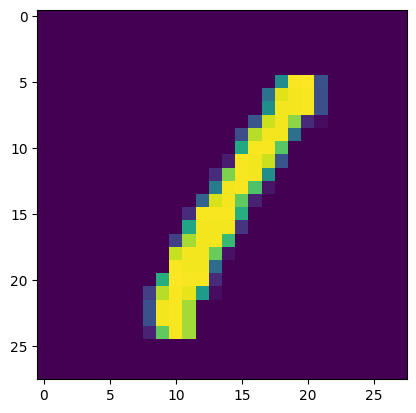

In [82]:
plt.imshow(x)

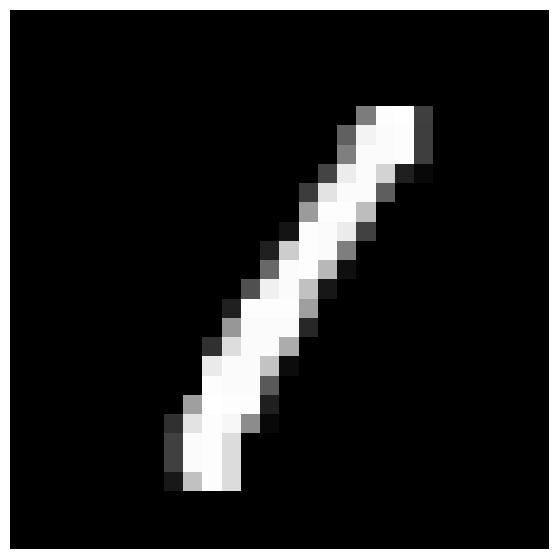

In [83]:
plot(x)

In [84]:
x.shape

(28, 28)

In [85]:
x.shape[0]

28

In [86]:
x.shape[1]

28

In [87]:
x = x.reshape(x.shape[0]*x.shape[1],1)

In [88]:
x.shape

(784, 1)

In [89]:
x = x.reshape(28,28)

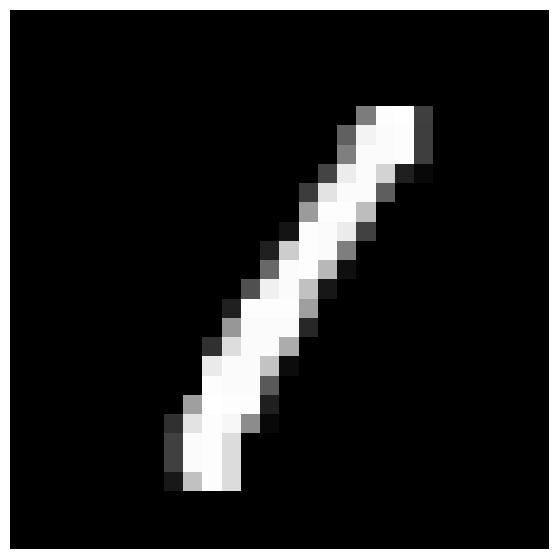

In [90]:
plot(x)

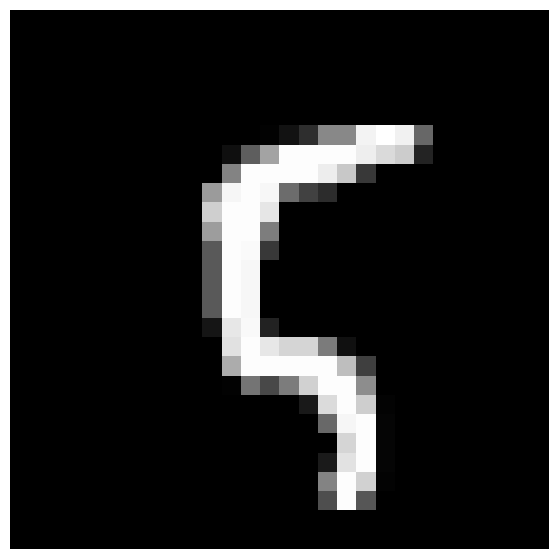

In [91]:
plot(X[100,0,:,:])

In [92]:
Y[120]

2

In [93]:
X[0:25,0,:,:].shape

(25, 28, 28)

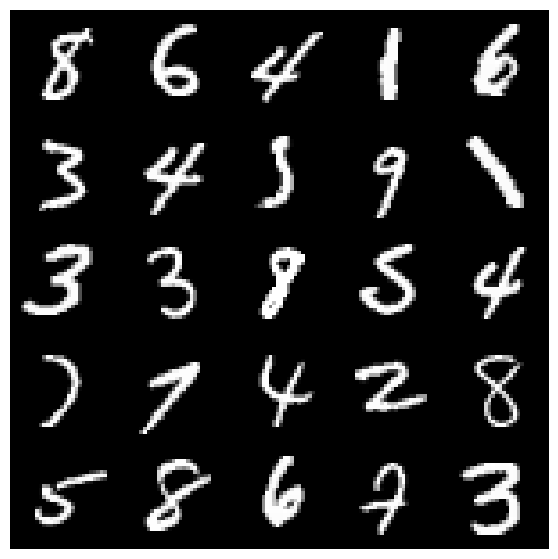

In [94]:
montage_plot(X[125:150,0,:,:])

Part 2

In [95]:
X = X.reshape(X.shape[0],784) #reshape image tensor
X_test = X_test.reshape(X_test.shape[0],784) #reshape image test data tensor

In [96]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [97]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [98]:
X = X.T

In [99]:
x = X[:,0:64]

In [100]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.], device='cuda:0')

In [101]:
M = GPU(np.random.rand(10,784))

In [102]:
y = M@x

In [103]:
torch.max(y,0)

torch.return_types.max(
values=tensor([58.9444, 64.5885, 41.1630, 36.9867, 49.5572, 60.9776, 36.5958, 74.6643,
        23.4175, 47.0561, 58.6014, 30.8436, 74.8647, 62.9859, 25.5917, 51.6651,
        50.9064, 56.0588, 28.1925, 37.3118, 71.9941, 71.9504, 32.9826, 36.3660,
        46.1227, 84.9896, 29.9855, 94.4051, 86.6955, 33.8281, 53.3624, 66.0704,
        37.1405, 45.3339, 76.0105, 35.4638, 66.6888, 77.1879, 44.3258, 56.1007,
        30.2977, 58.2698, 26.8387, 38.6879, 37.3160, 49.9373, 47.4560, 48.3328,
        36.6804, 68.6570, 39.6232, 92.5977, 56.7192, 35.3900, 51.0147, 68.1676,
        85.8689, 42.3691, 70.8639, 34.7106, 61.4438, 39.5963, 61.1758, 93.9128],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([0, 8, 5, 8, 8, 8, 9, 0, 4, 0, 2, 0, 1, 8, 9, 2, 0, 8, 5, 0, 7, 2, 3, 8,
        8, 5, 0, 1, 9, 8, 7, 3, 8, 2, 4, 2, 5, 2, 7, 8, 5, 8, 2, 0, 7, 8, 2, 0,
        0, 0, 5, 8, 0, 8, 0, 8, 7, 7, 5, 9, 3, 6, 8, 8], device='cuda:0'))

In [104]:
y = torch.argmax(y,0)

In [105]:
torch.sum((y == Y[0:64]))

tensor(4, device='cuda:0')

In [106]:
torch.sum((y == Y[0:64]))/64

tensor(0.0625, device='cuda:0')

In [107]:
batch_size = 64

M = GPU(np.random.rand(10,784))

y = M@x

y = torch.argmax(y,0)

torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.1094, device='cuda:0')

In [108]:
X=X.T

Part 3


In [109]:
M_Best = 0
Score_Best = 0

for i in range(100000):

    M_new = GPU(np.random.rand(10,784))

    y = M_new@x

    y = torch.argmax(y,0)

    Score = (torch.sum((y == Y[0:batch_size]))/batch_size).item()

    if Score > Score_Best:

        Score_Best = Score
        M_Best = M_new

        print(i,Score_Best)



0 0.078125
3 0.1875
13 0.203125
111 0.21875
288 0.234375
1173 0.265625
5021 0.3125
43149 0.328125
